In [1]:
import sys
sys.path.append('../src')
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import preprocessing as pre

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [2]:
#loading dataset
data=pre.load()

In [3]:
#preprocessing data
df=pre.preprocess(data)

In [4]:
df.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


In [5]:
# Calculate correlations with the target variable
corr_with_target = df.corr()['% Silica Concentrate'].sort_values(ascending=False)
print(corr_with_target)

# You may want to select the top features with the highest absolute correlation
selected_features = corr_with_target.index[1:8].tolist()  # Example: selecting top 7 features
print("Selected Features: ", selected_features)


% Silica Concentrate            1.000000
Amina Flow                      0.156701
% Silica Feed                   0.072724
Ore Pulp Density                0.046984
Flotation Column 02 Level       0.030955
Flotation Column 01 Level       0.017217
Flotation Column 03 Level       0.014246
Ore Pulp Flow                   0.008222
Flotation Column 04 Air Flow   -0.005011
Flotation Column 05 Air Flow   -0.009293
Flotation Column 06 Air Flow   -0.049650
Starch Flow                    -0.066394
Flotation Column 07 Air Flow   -0.071776
% Iron Feed                    -0.077052
Flotation Column 06 Level      -0.102443
date                           -0.109343
Flotation Column 07 Level      -0.141387
Ore Pulp pH                    -0.147739
Flotation Column 04 Level      -0.149456
Flotation Column 02 Air Flow   -0.167398
Flotation Column 05 Level      -0.169170
Flotation Column 03 Air Flow   -0.218891
Flotation Column 01 Air Flow   -0.219158
% Iron Concentrate             -0.800560
Name: % Silica C

In [6]:
x=df.iloc[:,1:23]
y=df['% Silica Concentrate']

In [7]:
#splitting dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,train_size=0.8)

In [8]:
x_train.shape,x_test.shape

((589962, 22), (147491, 22))

In [9]:
y_train.shape,y_test.shape

((589962,), (147491,))

In [10]:
trainset=pd.DataFrame(x_train,columns=x_train.columns)

In [11]:
trainset

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
680380,55.73,12.53,2179.580000,462.050000,382.033000,9.193560,1.701680,299.923,296.420,303.207,...,297.459,310.449,520.975000,516.500000,495.35500,515.970,525.840,502.345000,504.871000,65.17
252840,64.03,6.26,343.733000,547.341000,402.658000,10.002700,1.690620,300.085,302.849,302.531,...,297.900,299.300,444.023000,447.553000,444.62600,350.748,353.243,373.478000,350.711000,64.99
692773,54.83,15.93,1059.059417,313.327172,381.875207,8.754138,1.522615,298.357,302.894,298.357,...,339.271,234.694,673.014000,534.732000,730.74300,406.058,360.247,247.819000,310.749000,62.57
547961,57.46,10.80,4269.380000,553.496000,400.089000,10.623600,1.705790,247.852,295.185,299.711,...,288.179,294.003,504.059000,539.612000,518.12300,384.628,391.196,373.890000,362.789000,65.71
298072,64.03,6.26,890.984806,288.628529,400.541140,9.526230,1.540044,299.682,297.313,301.584,...,300.831,299.487,688.091000,601.087000,878.00475,493.615,451.179,528.265000,534.387000,66.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463164,55.40,16.83,3101.630000,613.560000,399.395000,10.010400,1.737540,299.993,299.937,300.231,...,299.268,302.390,498.748000,491.594000,501.34200,492.428,490.777,483.745000,463.734000,66.65
341459,64.03,6.26,3719.180000,548.431000,401.257000,10.277400,1.670320,299.927,299.226,299.493,...,300.210,300.493,409.121000,417.854000,419.10900,419.406,415.898,401.779000,394.065000,63.75
380981,44.90,30.12,3271.430000,626.947000,402.953000,10.065700,1.764550,300.590,300.942,299.431,...,299.749,299.662,406.248000,391.817000,393.74300,455.275,451.854,243.619722,179.474667,64.06
159563,55.45,16.76,2279.920000,579.515000,400.939000,9.477020,1.782730,299.842,297.086,297.300,...,300.298,304.371,461.001000,453.844000,466.83300,341.121,333.751,438.567000,276.892000,65.58


In [12]:
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred1=reg1.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred1)}')
print(f'mean_squared_error : {mean_squared_error(y_test,y_pred1)}')

mean_absolute_percentage_error : 0.24222883374063
mean_squared_error : 0.40409482200474356


In [13]:
reg2=Lasso()
reg2.fit(x_train,y_train)
y_pred2=reg2.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred2)}')

mean_absolute_percentage_error : 0.4176248057486822


In [14]:
reg3=Ridge()
reg3.fit(x_train,y_train)
y_pred3=reg3.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred3)}')

mean_absolute_percentage_error : 0.24222886366228188


In [15]:
reg4=DecisionTreeRegressor()
reg4.fit(x_train,y_train)
y_pred4=reg4.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred4)}')
print(f'mean_squared_error : {mean_squared_error(y_test,y_pred4)}')


mean_absolute_percentage_error : 0.0033007493252832903
mean_squared_error : 0.007019998851670801


In [16]:
'''
reg5=SVR()
reg5.fit(x_train,y_train)
y_pred5=reg5.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred5)}')'''

"\nreg5=SVR()\nreg5.fit(x_train,y_train)\ny_pred5=reg5.predict(x_test)\nprint(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred5)}')"

In [17]:
'''
reg6=RandomForestRegressor()
reg6.fit(x_train,y_train)
y_pred6=reg6.predict(x_test)
print(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred6)}')'''

"\nreg6=RandomForestRegressor()\nreg6.fit(x_train,y_train)\ny_pred6=reg6.predict(x_test)\nprint(f'mean_absolute_percentage_error : {mean_absolute_percentage_error(y_test,y_pred6)}')"

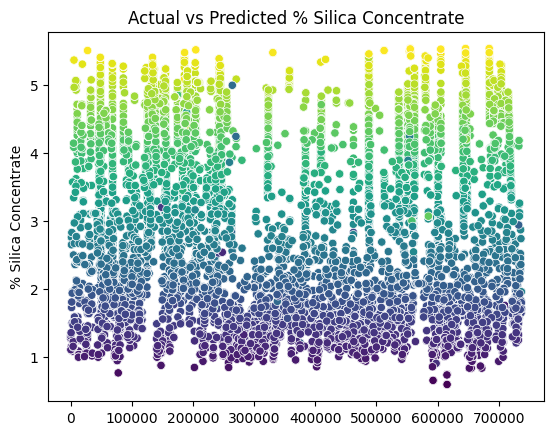

In [18]:
sns.scatterplot(y_test,c=y_pred4)
plt.title("Actual vs Predicted % Silica Concentrate")
plt.savefig(fname='../reports/figures/actual_Vs_pred')
plt.show()

In [19]:
pickle.dump(reg4,open('../models/trained_model.pkl','wb'))